# Used vheicals data Exploration

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("../data/train.csv", index_col='id')
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850
...,...,...,...,...,...,...,...,...,...,...,...,...
54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000
54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500
54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54273 entries, 0 to 54272
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         54273 non-null  object
 1   model         54273 non-null  object
 2   model_year    54273 non-null  int64 
 3   milage        54273 non-null  int64 
 4   fuel_type     54273 non-null  object
 5   engine        54273 non-null  object
 6   transmission  54273 non-null  object
 7   ext_col       54273 non-null  object
 8   int_col       54273 non-null  object
 9   accident      54273 non-null  object
 10  clean_title   54273 non-null  object
 11  price         54273 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 5.4+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
model_year,54273.0,2015.091979,5.588909,1974.0,2012.0,2016.0,2019.0,2024.0
milage,54273.0,72746.175667,50469.490448,100.0,32268.0,66107.0,102000.0,405000.0
price,54273.0,39218.443333,72826.335535,2000.0,15500.0,28000.0,45000.0,2954083.0


In [5]:
# most of the features are categorical

In [6]:
# need to encode each categories to in such a way usefull to regression
ordered_values = df.groupby(['brand'])['price'].median().sort_values().index.to_list()
n = len(ordered_values)



In [7]:
df.groupby(['brand', 'model','engine'])['price'].median().sort_values()


brand        model                     engine                                               
Audi         Frontier SE Crew Cab      261.0HP 4.0L V6 Cylinder Engine Gasoline Fuel               2000.0
Jeep         Wrangler Sport            210.0HP 4.0L Straight 6 Cylinder Engine Gasoline Fuel       2300.0
Ford         Mustang Premium           260.0HP 4.6L 8 Cylinder Engine Gasoline Fuel                2300.0
Jeep         E350 Super Duty Base      305.0HP 6.8L 10 Cylinder Engine Gasoline Fuel               2500.0
Dodge        Avenger SE                283.0HP 3.6L V6 Cylinder Engine Gasoline Fuel               2500.0
                                                                                                  ...    
Bugatti      Veyron 16.4 Grand Sport   8.0L W16 64V GDI DOHC Twin Turbo                         1950995.0
Lamborghini  570S Spider               5.2L V10 40V GDI DOHC                                    1950995.0
Audi         R8 5.2 V10 performance    5.2L V10 40V GDI DOH

In [8]:
# cetegorize features

def ordinal_feature_labeler(df ,features_list, target):
    ''' 
    This function will label categorical features list features to ordinal label.
    '''
    transformed_df = pd.DataFrame({"temp":np.arange(df.shape[0])}, index=df.index)

    transformed_label_data = {}

    for feature in features_list:
        ordered_values = df.groupby([feature])[target].median().sort_values().index.to_list()
        n = len(ordered_values)

        value_dict = {i:j for i, j in zip(ordered_values, list(range(n)))}

        # copy the categories values data
        transformed_label_data[feature] = value_dict.copy()

        transformed_df[feature] = df[feature].apply(lambda x: value_dict[x])
    
    transformed_df.drop(['temp'], axis=1, inplace=True)

    return transformed_df, transformed_label_data


def label_form_dict(df, label_dict):
    """
    Transforms the given df categorical labels according to given dict labels.
    """
    temp_df = df.copy()
    for feature in label_dict.keys():
        labels = label_dict[feature]
        temp_df[feature] = temp_df[feature].apply(lambda x: labels[x] if x in label_dict.keys() else len(label_dict) / 2)

    return temp_df

feature_to_transform = 'brand model fuel_type engine transmission ext_col int_col accident clean_title'.split()
dont_change = 'model_year milage price'.split()

next_df, labels = ordinal_feature_labeler(df, feature_to_transform, 'price')
next_df[dont_change] = df[dont_change]

next_df


,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,model_year,milage,price
id,,,,,,,,,,,,
0,32,1272,3,769,31,60,3,1,0,2018,74349,11000
1,30,384,3,418,9,45,25,1,0,2007,80000,8250
2,27,358,3,265,5,9,6,1,0,2009,91491,15000
3,30,1562,6,860,17,87,43,1,0,2022,2437,63500
4,9,223,3,81,4,48,25,1,0,2001,111000,7850
...,...,...,...,...,...,...,...,...,...,...,...,...
54268,30,1191,3,672,19,48,43,1,0,2017,29000,29000
54269,29,325,2,420,5,45,25,0,0,2015,94634,6500
54270,41,1013,3,669,17,48,25,0,0,2013,40989,18950


In [9]:
# sns.pairplot(next_df)
# plt.show()

In [9]:
next_df.describe().T

,count,mean,std,min,25%,50%,75%,max
brand,54273.0,28.318317,8.289894,0.0,25.0,30.0,33.0,52.0
model,54273.0,941.392313,484.371643,0.0,546.0,925.0,1363.0,1826.0
fuel_type,54273.0,3.103532,0.645610,0.0,3.0,3.0,3.0,6.0
engine,54273.0,552.804710,262.132421,0.0,354.0,590.0,759.0,1060.0
transmission,54273.0,11.515542,8.698085,0.0,4.0,9.0,19.0,45.0
ext_col,54273.0,53.295930,31.023410,0.0,45.0,48.0,60.0,259.0
int_col,54273.0,22.889264,15.523508,0.0,6.0,25.0,25.0,123.0
accident,54273.0,0.735098,0.441285,0.0,0.0,1.0,1.0,1.0
clean_title,54273.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
model_year,54273.0,2015.091979,5.588909,1974.0,2012.0,2016.0,2019.0,2024.0


In [13]:
next_df['year_old'] = 2024 - next_df['model_year']
next_df.describe().T

,count,mean,std,min,25%,50%,75%,max
brand,54273.0,28.318317,8.289894,0.0,25.0,30.0,33.0,52.0
model,54273.0,941.392313,484.371643,0.0,546.0,925.0,1363.0,1826.0
fuel_type,54273.0,3.103532,0.645610,0.0,3.0,3.0,3.0,6.0
engine,54273.0,552.804710,262.132421,0.0,354.0,590.0,759.0,1060.0
transmission,54273.0,11.515542,8.698085,0.0,4.0,9.0,19.0,45.0
ext_col,54273.0,53.295930,31.023410,0.0,45.0,48.0,60.0,259.0
int_col,54273.0,22.889264,15.523508,0.0,6.0,25.0,25.0,123.0
accident,54273.0,0.735098,0.441285,0.0,0.0,1.0,1.0,1.0
clean_title,54273.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
model_year,54273.0,2015.091979,5.588909,1974.0,2012.0,2016.0,2019.0,2024.0


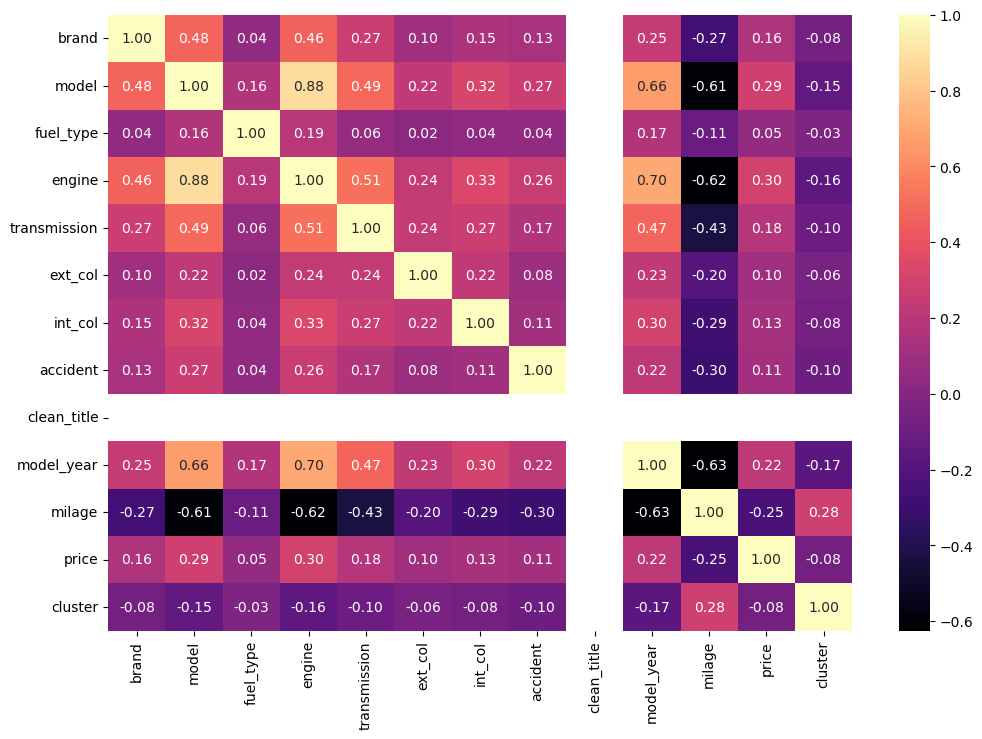

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(next_df.corr(), fmt='0.2f', cmap='magma', annot=True)
plt.show()

In [36]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=50)

cluster.fit(next_df[['milage', 'model_year']])

next_df['cluster'] = cluster.labels_

next_df.head()

c:\Users\mohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,model_year,milage,price,cluster,cluster2
id,,,,,,,,,,,,,,
0,32,1272,3,769,31,60,3,1,0,2018,74349,11000,35,3
1,30,384,3,418,9,45,25,1,0,2007,80000,8250,49,7
2,27,358,3,265,5,9,6,1,0,2009,91491,15000,6,7
3,30,1562,6,860,17,87,43,1,0,2022,2437,63500,17,8
4,9,223,3,81,4,48,25,1,0,2001,111000,7850,21,0


In [37]:
cluster2 = KMeans(n_clusters=50)

cluster2.fit(next_df[['milage', 'model']])

next_df['cluster2'] = cluster2.labels_

next_df.head()

c:\Users\mohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,model_year,milage,price,cluster,cluster2
id,,,,,,,,,,,,,,
0,32,1272,3,769,31,60,3,1,0,2018,74349,11000,35,2
1,30,384,3,418,9,45,25,1,0,2007,80000,8250,49,47
2,27,358,3,265,5,9,6,1,0,2009,91491,15000,6,12
3,30,1562,6,860,17,87,43,1,0,2022,2437,63500,17,11
4,9,223,3,81,4,48,25,1,0,2001,111000,7850,21,15


In [38]:
cluster3 = KMeans(n_clusters=50)

cluster3.fit(next_df[['milage', 'engine']])

next_df['cluster3'] = cluster3.labels_

next_df.head()

c:\Users\mohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,model_year,milage,price,cluster,cluster2,cluster3
id,,,,,,,,,,,,,,,
0,32,1272,3,769,31,60,3,1,0,2018,74349,11000,35,2,4
1,30,384,3,418,9,45,25,1,0,2007,80000,8250,49,47,35
2,27,358,3,265,5,9,6,1,0,2009,91491,15000,6,12,41
3,30,1562,6,860,17,87,43,1,0,2022,2437,63500,17,11,25
4,9,223,3,81,4,48,25,1,0,2001,111000,7850,21,15,11


In [39]:
cluster24 = KMeans(n_clusters=50)

cluster24.fit(next_df[['milage', 'transmission']])

next_df['cluster24'] = cluster24.labels_

next_df.head()

c:\Users\mohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,model_year,milage,price,cluster,cluster2,cluster3,cluster24
id,,,,,,,,,,,,,,,,
0,32,1272,3,769,31,60,3,1,0,2018,74349,11000,35,2,4,6
1,30,384,3,418,9,45,25,1,0,2007,80000,8250,49,47,35,45
2,27,358,3,265,5,9,6,1,0,2009,91491,15000,6,12,41,22
3,30,1562,6,860,17,87,43,1,0,2022,2437,63500,17,11,25,15
4,9,223,3,81,4,48,25,1,0,2001,111000,7850,21,15,11,32
